<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/session_11/CS166_PCW_Session_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sampling bias for bus waiting times

In [13]:
import numpy as np
import scipy.stats as sts
import scipy
import matplotlib.pyplot as plt

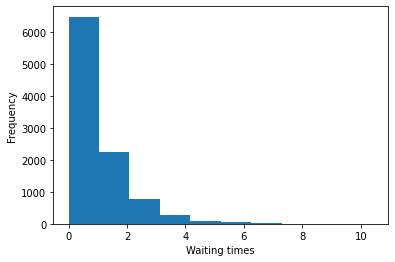

(1.0039230748944818, 1.0490397048664883)

In [29]:
lambda_val = 1
start_time = 0
end_time = 10
exponential_distribution = sts.expon(scale = 1/lambda_val)
uniform_distribution = sts.uniform(loc = 0, scale = lambda_val * 2)


def binary_search_next_largest(sorted_arr, val):
    l = 0
    r = len(sorted_arr)

    while l < r:
        mid = (l + r) // 2
        if sorted_arr[mid] < val:
            l = mid + 1
        else:
            r = mid
    return sorted_arr[l]


def get_waiting_time(distribution, start_time = start_time, end_time = end_time):
    duration = end_time - start_time
    bus_arrival_times = [distribution.rvs()]
    while bus_arrival_times[-1] <= end_time:
        bus_arrival_times.append(bus_arrival_times[-1] + distribution.rvs())
    passenger_arrival = sts.uniform(loc=start_time, scale=end_time).rvs()

    #do binary search so it's faster
    next_arrival = binary_search_next_largest(bus_arrival_times, passenger_arrival)
    return next_arrival - passenger_arrival


def simulate_waiting_time(reps = 10000, *args, **kwargs):
    waiting_times = []
    for _ in range(reps):
        waiting_times.append(get_waiting_time(*args, **kwargs))

    plt.hist(waiting_times)
    plt.xlabel("Waiting times")
    plt.ylabel("Frequency")
    plt.show()
    
    return (np.mean(waiting_times), np.var(waiting_times))

simulate_waiting_time(distribution = exponential_distribution)


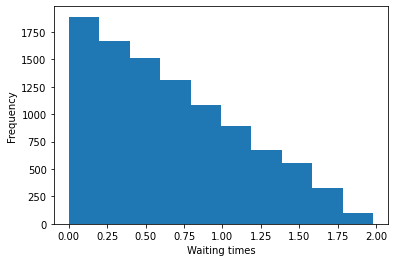

(0.6670609692945713, 0.22224214211741036)

In [30]:
simulate_waiting_time(distribution = uniform_distribution)

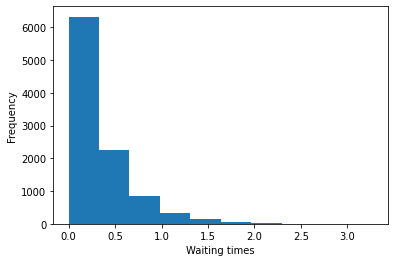

(0.33316609859760327, 0.11456766285828986)

In [31]:
lambda_val = 3
start_time = 0
end_time = 30
exponential_distribution = sts.expon(scale = 1/lambda_val)
uniform_distribution = sts.uniform(loc = 0, scale = lambda_val * 2)
simulate_waiting_time(distribution = exponential_distribution)

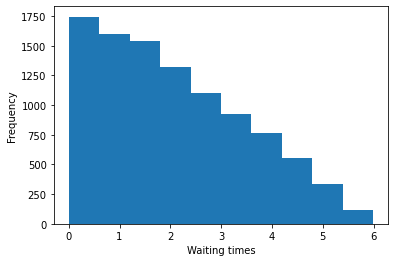

(2.0817050643896167, 2.039100669236283)

In [32]:
simulate_waiting_time(distribution = uniform_distribution)

We can see that the expected waiting time for exponential distribution is roughly equal to 1/lambda, whereas the uniform distribution is roughly equal to 2/3 * lambda. 

## Retirement benefit projection

In [1]:
data = {
    50: 0.00832,
    51: 0.00911,
    52: 0.00996,
    53: 0.01089,
    54: 0.01190,
    55: 0.01300,
    56: 0.01421,
    57: 0.01554,
    58: 0.01700,
    59: 0.01859,
    60: 0.02034,
    61: 0.02224,
    62: 0.02431,
    63: 0.02657,
    64: 0.02904,
    65: 0.03175,
    66: 0.03474,
    67: 0.03804,
    68: 0.04168,
    69: 0.04561,
    70: 0.04979,
    71: 0.05415,
    72: 0.05865,
    73: 0.06326,
    74: 0.06812,
    75: 0.07337,
    76: 0.07918,
    77: 0.08570,
    78: 0.09306,
    79: 0.10119,
    80: 0.10998,
    81: 0.11935,
    82: 0.12917,
    83: 0.13938,
    84: 0.15001,
    85: 0.16114,
    86: 0.17282,
    87: 0.18513,
    88: 0.19825,
    89: 0.21246,
    90: 0.22814,
    91: 0.24577,
    92: 0.26593,
    93: 0.28930,
    94: 0.31666,
    95: 0.35124,
    96: 0.40056,
    97: 0.48842,
    98: 0.66815,
    99: 0.72000,
    100: 0.76000,
    101: 0.80000,
    102: 0.85000,
    103: 0.90000,
    104: 0.96000,
    105: 1.00000}

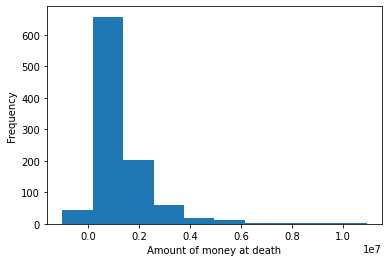

In [11]:
initial = 150000
interest_mean = 0.08
interest_std = 0.09
investing = 10000
starting_age = 50
withdrawal = 65000
withdrawal_age = 70
def money_at_death(initial = initial, interest_mean = interest_mean, 
                   interest_std = interest_std, investing = investing, 
                   starting_age = starting_age, withdrawal = withdrawal,
                   withdrawal_age = withdrawal_age, mortality_table = data):
    
    investment_distribution = sts.norm(loc=interest_mean, scale=interest_std)

    total_money = initial
    current_age = starting_age

    while np.random.uniform(size=1) > mortality_table[current_age]:
        total_money *= (1 + investment_distribution.rvs())
        if current_age < withdrawal_age:
            total_money += investing
        else:
            total_money -= withdrawal
        current_age += 1
    
    return total_money

def simulate_total_money(reps = 1000, *args, **kwargs):
    y_vals = []
    for _ in range(reps):
        y_vals.append(money_at_death(*args, **kwargs))
    plt.hist(y_vals)
    plt.xlabel("Amount of money at death")
    plt.ylabel("Frequency")

simulate_total_money()